In [1]:
# Libraries import
from sklearn import linear_model

import scipy as scp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Water falling from pipe

This notebook describes concepts about linear regression related to physics. Since it uses an image, image processing concepts are useful. The bottom side of the pipe is the coordinate system orientation, with x axis pointing right and y axis pointing bottom. Also, the data regression requires data normalization.

In [2]:
# Water falling initial pixel coordinates
x0 = 253
y0 = 561

In [3]:
# Collected data
df_ = pd.read_csv('rain.csv')

# Data normalization
max_px = max(df_['px'])
max_py = max(df_['py'])

df = pd.DataFrame(columns=['px', 'py'])

df['px'] = df_['px']/max_px
df['py'] = df_['py']/max_py

# Data Interpolation
n = 2;

fields = []

for i in range(2, n+1):
    field = 'px**' + str(i)
    fields.append(field)
    
    df[field] = df['px']**i

fields.append('py')

df = df[fields]

df_np = df.to_numpy()

x = df_np[:, 0:n-1]
y = df_np[:, n-1:n]

In [4]:
regr = linear_model.LinearRegression()
predictor = regr.fit(x, y)
df_np = df.to_numpy()

In [5]:
dx = 0.01

vals = np.arange(0, 1, dx)
vecs = []

for i in range(2, n+1):
    vec = vals**i
    vecs.append(vec)

X = np.column_stack(tuple(vecs))
Y = regr.predict(X)

(239.3, 540.7, 527.75, 1259.25)

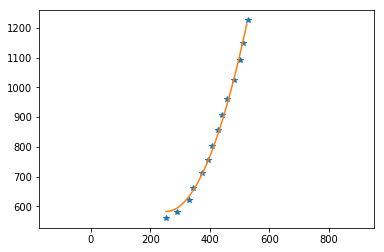

In [6]:
px = (df_['px']/max_px).to_numpy()
py = (df_['py']/max_py).to_numpy()

x_orig = x0 + px*max_px
y_orig = y0 + py*max_py

x_pred = x0 + vals*max_px
y_pred = y0 + Y*max_py

plt.figure()
plt.plot(x_orig, y_orig, '*')
plt.plot(x_pred, y_pred)

plt.axis('equal')

In [7]:
print(regr.coef_)

[[0.96750082]]


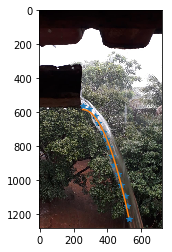

In [8]:
img = plt.imread('rain.jpg')

plt.imshow(img)
plt.plot(x_orig, y_orig, '*')
plt.plot(x_pred, y_pred)

plt.savefig('rain_interp.eps')


In [32]:
df_norm = pd.DataFrame(columns=['px', 'py'])

df_norm['px'] = df_['px']/max_px
df_norm['py'] = df_['py']/max_py

df_vel = pd.DataFrame(columns=['vx2_col', 'g_col'])

df_vel['vx2_col'] = 2*df_norm['py']
df_vel['g_col'] = -df_norm['px']**2


In [33]:
df_vel

,vx2_col,g_col
0,0.000000,-0.000000
1,0.063158,-0.019234
2,0.177444,-0.076935
3,0.306767,-0.107891
4,0.457143,-0.191806
5,0.583459,-0.264812
6,0.724812,-0.320009
7,0.893233,-0.407920
8,1.040602,-0.465781
9,1.200000,-0.565241


In [34]:
A = df_vel.to_numpy()

In [173]:
ATA = np.matmul(A.T, A)
ews, evs = np.linalg.eig(ATA)

print(ews)
print(evs)

ew0 = ews[0]
ew1 = ews[1]

E0 = ew0*np.identity(2) - ATA
E1 = ew1*np.identity(2) - ATA

print(E0)
print(E1)

ev0 = [-E0[0, 1], E0[0, 0]]
ev1 = [-E1[1, 1], E1[1, 0]]

ev0 = ev0/np.linalg.norm(ev0)
ev1 = ev1/np.linalg.norm(ev1)

print(ev0)
print(ev1)


[2.00729916e+01 9.17809220e-03]
[[ 0.897754    0.44049717]
 [-0.44049717  0.897754  ]]
[[ 3.89313744  7.93439754]
 [ 7.93439754 16.17067605]]
[[-16.17067605   7.93439754]
 [  7.93439754  -3.89313744]]
[-0.897754    0.44049717]
[0.44049717 0.897754  ]


In [138]:
print(ew0)
print(ev0)

print(np.dot(ATA, ev0))
print(ew0*ev0)

print('-----')

print(ew1)
print(ev1)

print(np.dot(ATA, ev1))
print(ew1*ev1)

print('-----')

20.07299158798244
[-0.897754    0.44049717]
[-18.02060843   8.84209608]
[-18.02060843   8.84209608]
-----
0.009178092198927956
[0.44049717 0.897754  ]
[0.00404292 0.00823967]
[0.00404292 0.00823967]
-----


In [167]:
gravity = 9.8

gravity_pixel = ev1[1]*max_py
speed_pixel = np.sqrt(ev1[0])*max_px

sigma = max_py*gravity_pixel/gravity
speed = max_px*speed_pixel/sigma

In [172]:
print('{:.2f}'.format(speed) + ' m/s')

1.23 m/s
